In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from prophet import Prophet
import numpy as np
import statsmodels.formula.api as smf

In [5]:
rd=pd.read_csv('https://raw.githubusercontent.com/mths-andrade/dolar/main/real_dolar.csv')

In [6]:
rd['data']=pd.to_datetime(rd['data'])
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    7695 non-null   datetime64[ns]
 1   reais   7400 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 120.4 KB


In [7]:
rd.shape

(7695, 2)

In [8]:
rd['reais']=rd['reais'].interpolate(method='linear')
rd.head()

,data,reais
0,1995-01-02,0.844
1,1995-01-03,0.845
2,1995-01-04,0.845
3,1995-01-05,0.843
4,1995-01-06,0.840


In [9]:
rd['mes'] = rd['data'].dt.to_period('M')
rd.head()

,data,reais,mes
0,1995-01-02,0.844,1995-01
1,1995-01-03,0.845,1995-01
2,1995-01-04,0.845,1995-01
3,1995-01-05,0.843,1995-01
4,1995-01-06,0.840,1995-01


In [10]:
rd.isnull().sum()

,0
data,0
reais,0
mes,0


In [11]:
rd.describe()

,data,reais
count,7695,7695.000000
mean,2009-09-29 23:59:59.999999744,2.719741
min,1995-01-02 00:00:00,0.832000
25%,2002-05-16 12:00:00,1.787000
50%,2009-09-30 00:00:00,2.312000
75%,2017-02-13 12:00:00,3.495550
max,2024-06-28 00:00:00,5.920400
std,NaN,1.309956


In [12]:
media=(rd['reais'].mean()).round(2)
min=(rd['reais'].min()).round(2)
max=(rd['reais'].max()).round(2)
desv_pad=(rd['reais'].std()).round(2)
mediana=(rd['reais'].median()).round(2)
moda=((rd['reais'].mode()).round(2))[0]

In [13]:
rd.sort_values(by='reais')

,data,reais,mes
30,1995-02-13,0.8320,1995-02
28,1995-02-09,0.8330,1995-02
31,1995-02-14,0.8340,1995-02
29,1995-02-10,0.8340,1995-02
27,1995-02-08,0.8350,1995-02
...,...,...,...
6613,2020-05-07,5.8027,2020-05
6831,2021-03-09,5.8084,2021-03
6619,2020-05-15,5.8235,2020-05
6618,2020-05-14,5.9181,2020-05


In [14]:
print(f'A média histórica da cotação do dólar é de R${media}, enquanto o valor mínimo é de R${min} em 13 de fevereiro de 1995 e o máximo, R${max}, em 13 de maio de 2020.')

A média histórica da cotação do dólar é de R$2.72, enquanto o valor mínimo é de R$0.83 em 13 de fevereiro de 1995 e o máximo, R$5.92, em 13 de maio de 2020.


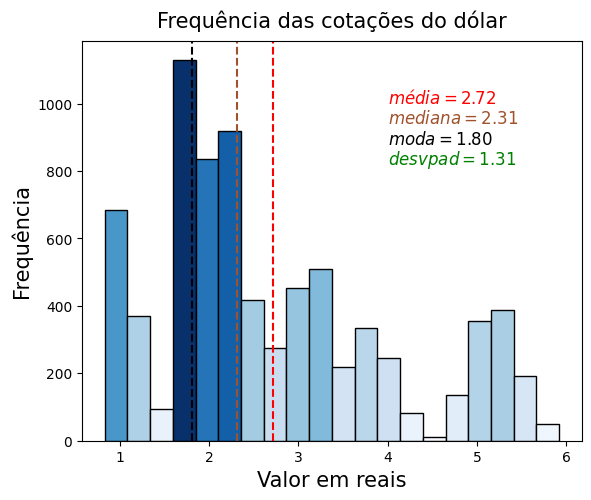

In [20]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
mu, mediana, moda = rd['reais'].mean(), rd['reais'].median(), rd['reais'].mode().iloc[0]

mu, med, desv, moda = media, mediana, desv_pad, moda

N, bins, patches = eixo.hist(rd['reais'], bins=20, edgecolor='black')
eixo.set_title('Frequência das cotações do dólar', fontsize=15, pad=10)
eixo.set_xlabel('Valor em reais', fontsize=15)
eixo.set_ylabel('Frequência', fontsize=15)

fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.Blues(norm(thisfrac))
    thispatch.set_facecolor(color)

eixo.annotate('$média = {0:.2f}$'.format(mu),
               xy=(4.0, 1000), fontsize=12, color='red')
eixo.annotate('$mediana = {0:.2f}$'.format(med),
               xy=(4.0, 940), fontsize=12, color='sienna')
eixo.annotate('$moda = {0:.2f}$'.format(moda),
               xy=(4.0, 880), fontsize=12, color='black')
eixo.annotate('$desvpad = {0:.2f}$'.format(desv),
               xy=(4.0, 820), fontsize=12,color='green')

eixo.axvline(mu, color = 'red', linestyle='--')
eixo.axvline(med, color='sienna', linestyle='--')
eixo.axvline(moda, color='black', linestyle='--')

plt.show()

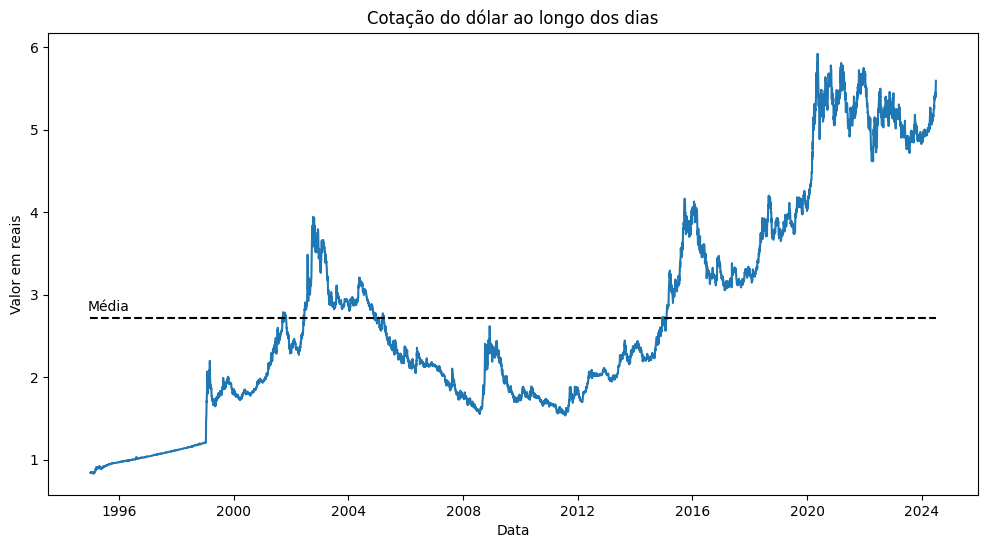

In [ ]:
x=rd.data
y=rd.reais

plt.figure(figsize=(12,6))
ax=sns.lineplot(data=rd, x='data', y='reais')
plt.title('Cotação do dólar ao longo dos dias')
plt.xlabel('Data')
plt.ylabel('Valor em reais')
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.text(9100, 2.8, 'Média', fontsize=10, color = 'black', ha = "left")
plt.show()

In [ ]:
media_mes=(rd.groupby('mes')['reais'].mean()).round(2).reset_index()
media_mes['mes'] = media_mes['mes'].dt.to_timestamp()
media_mes.head()

,mes,reais
0,1995-01-01,0.85
1,1995-02-01,0.84
2,1995-03-01,0.89
3,1995-04-01,0.91
4,1995-05-01,0.90


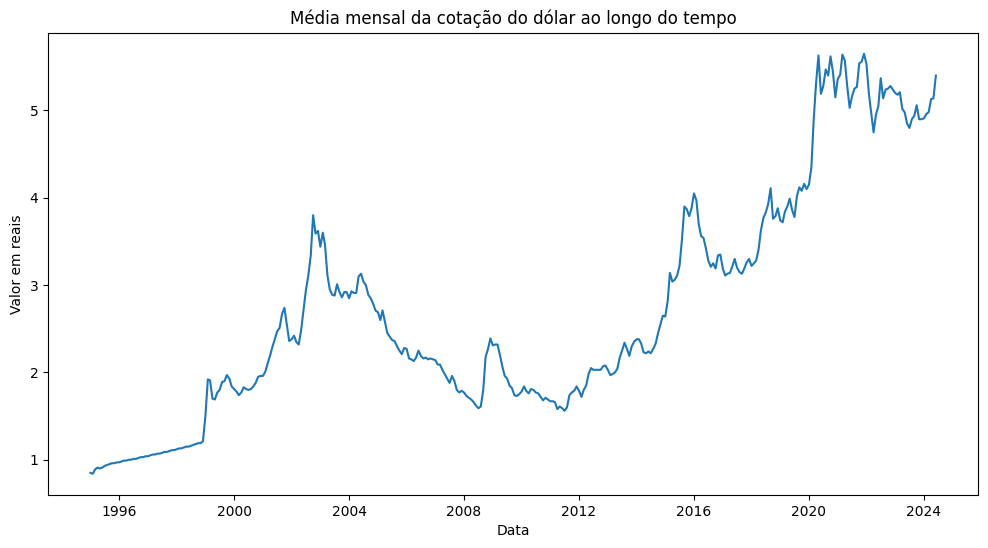

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=media_mes, x='mes', y='reais')
plt.title('Média mensal da cotação do dólar ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor em reais')
plt.show()

<Axes: xlabel='mes_numeric', ylabel='reais'>

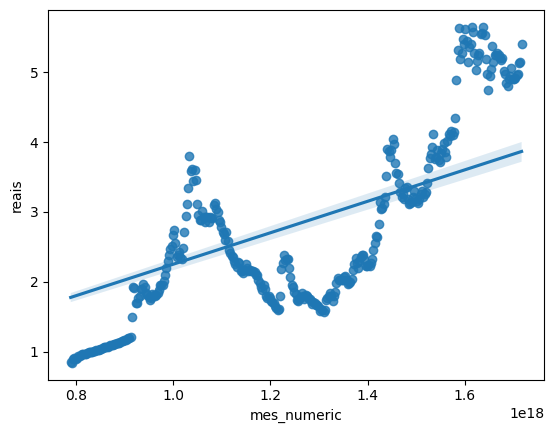

In [ ]:
media_mes['mes_numeric'] = media_mes['mes'].astype(int)
sns.regplot(data=media_mes,x='mes_numeric',y='reais')

In [ ]:
modelo=smf.ols(formula='mes_numeric ~ reais',data=media_mes).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            mes_numeric   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     718.9
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           4.65e-87
Time:                        17:28:30   Log-Likelihood:                -14512.
No. Observations:                 354   AIC:                         2.903e+04
Df Residuals:                     352   BIC:                         2.904e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.954e+17   1.89e+16     41.999      0.0

In [ ]:
rd_prophet = media_mes[['mes', 'reais']].rename(columns={'mes': 'ds', 'reais': 'y'})
rd_prophet.head()

,ds,y
0,1995-01-01,0.85
1,1995-02-01,0.84
2,1995-03-01,0.89
3,1995-04-01,0.91
4,1995-05-01,0.90


In [ ]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(rd_prophet)

futuro = modelo.make_future_dataframe(periods=7, freq='M')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkq6brux_/guj5j7s1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkq6brux_/sd9s0vha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61295', 'data', 'file=/tmp/tmpkq6brux_/guj5j7s1.json', 'init=/tmp/tmpkq6brux_/sd9s0vha.json', 'output', 'file=/tmp/tmpkq6brux_/prophet_model_mu98hno/prophet_model-20240710172830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


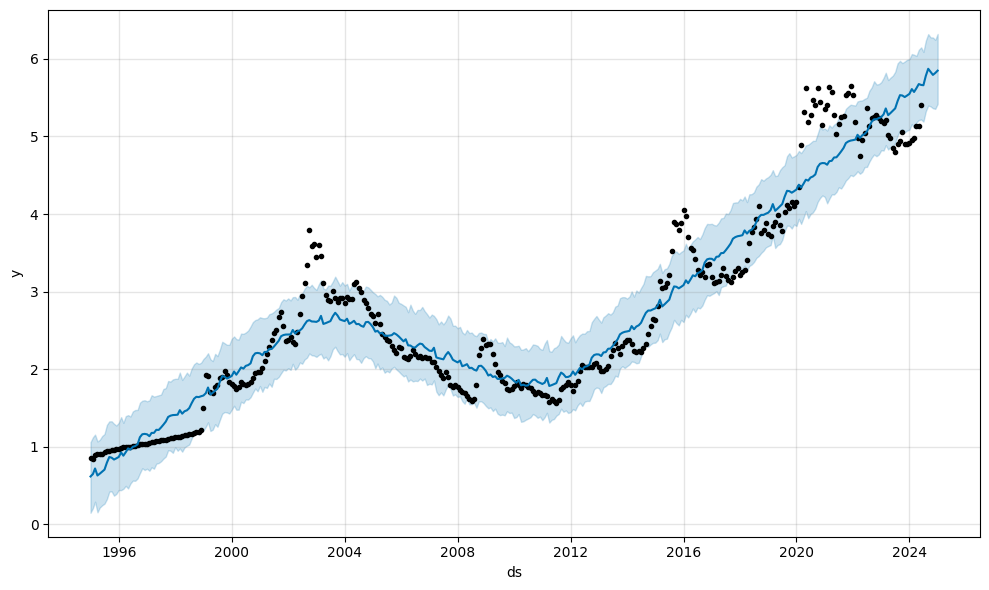

In [ ]:
fig1 = modelo.plot(previsao)

In [ ]:
from prophet.plot import plot_plotly
fig = plot_plotly(modelo, previsao)
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Cotação (R$)',
    title='Cotação mensal do dólar de 1995 até dezembro de 2024')
fig.show()

In [ ]:
fig.write_html('real_dolar.html')

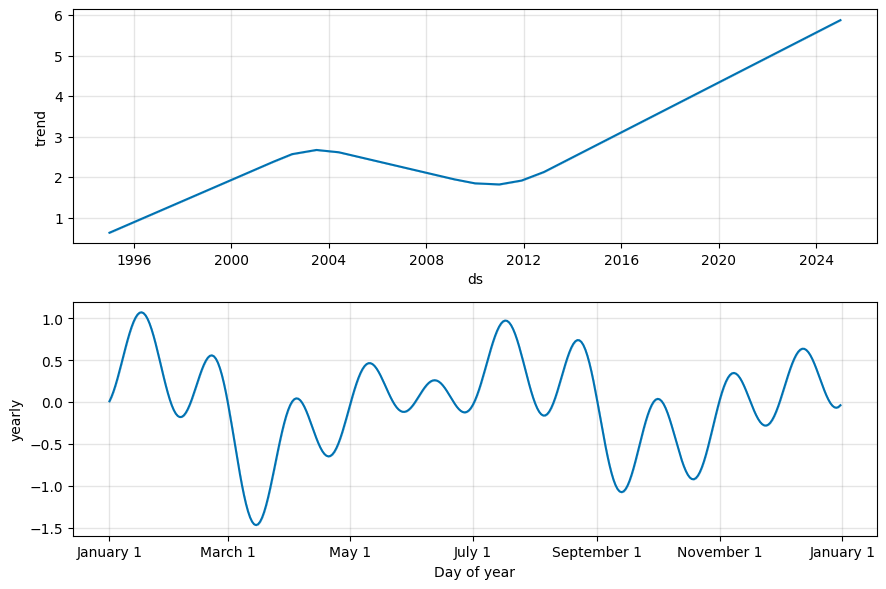

In [ ]:
fig2 = modelo.plot_components(previsao)